Загрузка ../data/train/chunk_0.pkl.gz...
Всего примеров в чанке: 100

--- Пример 1 (Индекс 19) ---
Формула (str): 0.5*log(x)
Токены (ids): [ 1  4 13  9 12  2]
Восстановлено из токенов: CONST*log(x)


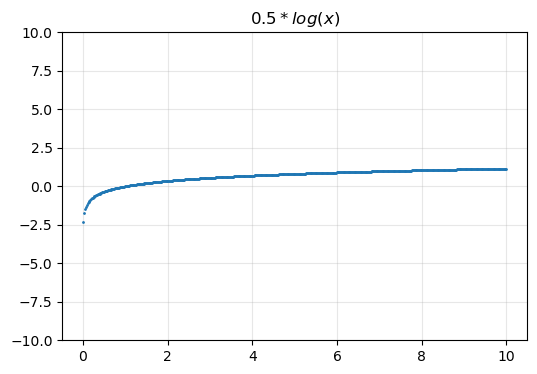


--- Пример 2 (Индекс 2) ---
Формула (str): 2.718**Abs(cos(x))
Токены (ids): [ 1  8 11  7 12  2]
Восстановлено из токенов: exp(Abs(cos(x)))


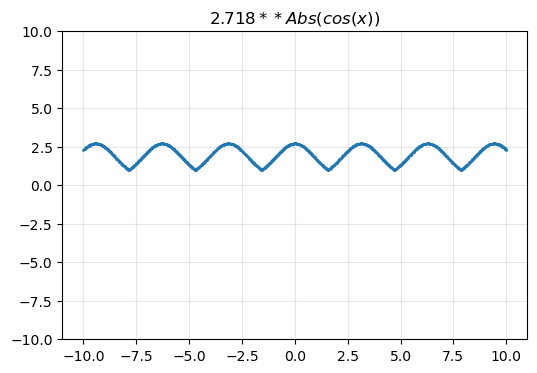


--- Пример 3 (Индекс 47) ---
Формула (str): (x**2 + x - (x + 0.158)*Abs(x))/log(x**2*cos(x)**2)
Токены (ids): [ 1  4  5  9  4  5 12 17  5  7 12 17 14  3  3 12  5 12 17  4  4 13  3 13
 12 11 12  2]
Восстановлено из токенов: ((CONST*(CONST + x))*Abs(x) + (x**2 + x))/log(x**2*cos(x)**2)


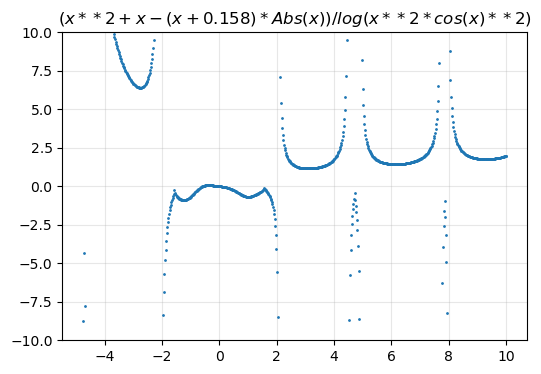


--- Пример 4 (Индекс 95) ---
Формула (str): 4.564**(-1.656*x + Abs(x) + 3.659)
Токены (ids): [ 1  5 13  3  3 13  4 13 12 11 12  2]
Восстановлено из токенов: CONST**((CONST*x + CONST) + Abs(x))


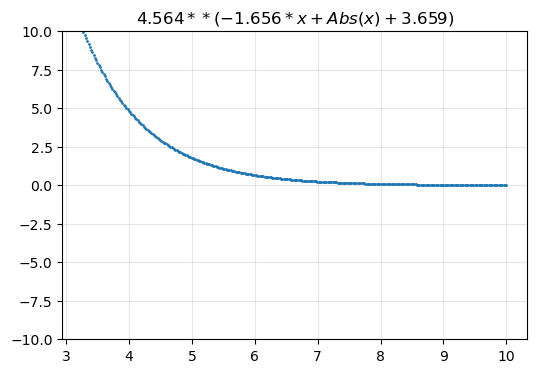


--- Пример 5 (Индекс 51) ---
Формула (str): 2.718**(log(x**2*(x - 0.051))/(2*Abs(x)))
Токены (ids): [ 1  8  4  4 13  5 11 12 14  9  4  5 12 17  3 13 12  2]
Восстановлено из токенов: exp((CONST/Abs(x))*log(x**2*(CONST + x)))


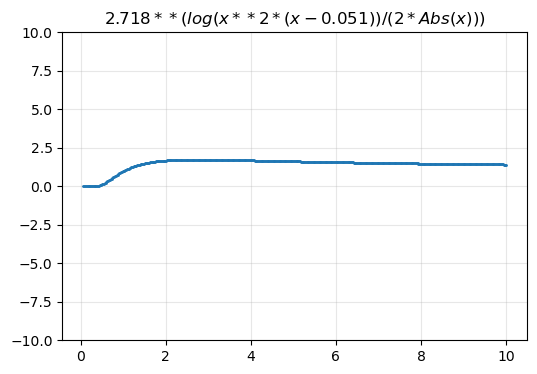

In [ ]:
import gzip
import pickle
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path


from src.tokenizer import Tokenizer

def inspect_chunk(file_path, num_samples=3):
    path = Path(file_path)
    if not path.exists():
        print(f"Файл {path} не найден!")
        return

    print(f"Загрузка {path}...")
    with gzip.open(path, 'rb') as f:
        data = pickle.load(f)
    
    print(f"Всего примеров в чанке: {len(data)}")
    
    tokenizer = Tokenizer()

    indices = np.random.choice(len(data), num_samples, replace=False)
    
    for i, idx in enumerate(indices):
        item = data[idx]
        expr_str = item['expr_str']
        tokens = item['tokens']
        points = item['points'] # shape (N, 3) -> x, y, mask
        
        print(f"\n--- Пример {i+1} (Индекс {idx}) ---")
        print(f"Формула (str): {expr_str}")
        print(f"Токены (ids): {tokens}")

        try:
            # Убираем SOS, EOS и PAD перед восстановлением
            clean_tokens = tokens[(tokens != 0) & (tokens != 1) & (tokens != 2)] 
            reconstructed = tokenizer.token_seq_to_expr(clean_tokens)
            print(f"Восстановлено из токенов: {reconstructed}")
        except Exception as e:
            print(f"Ошибка восстановления: {e}")

        x = points[:, 0]
        y = points[:, 1]
        mask = points[:, 2].astype(bool)
        
        plt.figure(figsize=(6, 4))
        plt.plot(x[mask], y[mask], '.', label='Valid points', markersize=2)
        
        plt.title(f"${expr_str}$")
        plt.ylim(-10, 10)
        plt.grid(True, alpha=0.3)
        plt.show()

if __name__ == "__main__":
    TARGET_FILE = "../data/train/chunk_0.pkl.gz" 
    
    inspect_chunk(TARGET_FILE, num_samples=5)